In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Inspect the data frames

In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploring the gender distribution
## The male passangers are overrepresented, however more female passenger survived. The gender distribution matches in the train and in the test set.

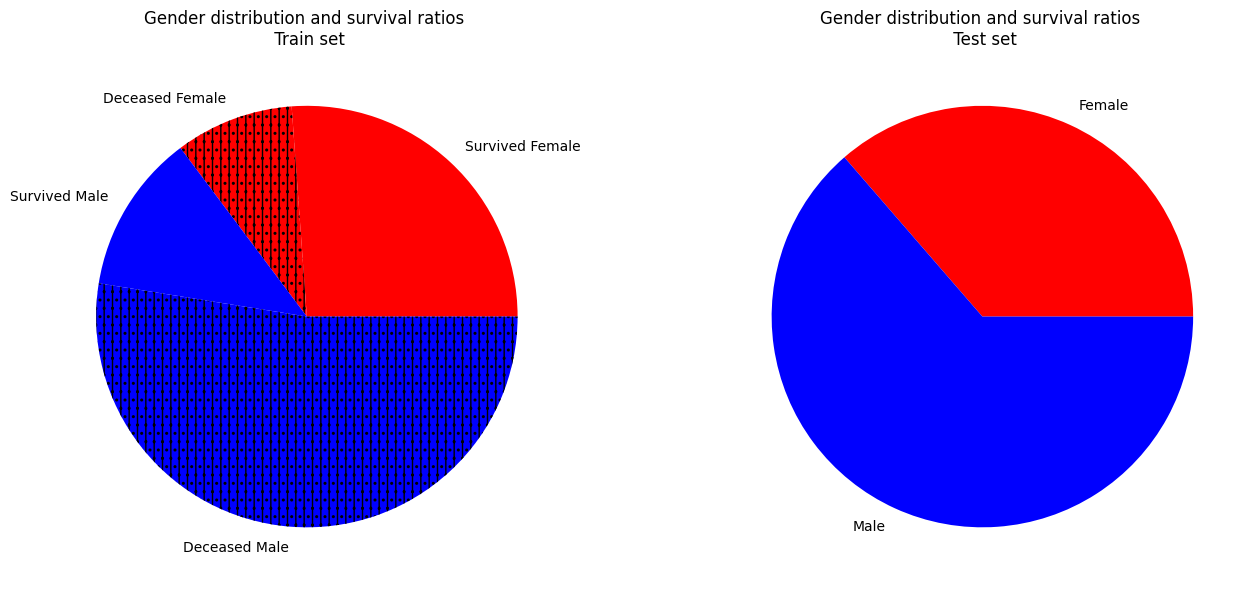

In [14]:
import matplotlib.pyplot as plt

female = train_data.loc[train_data.Sex == 'female']["Survived"]
male = train_data.loc[train_data.Sex == 'male']["Survived"]

all_female = len(female)
all_male = len(male)

dead_female = sum(female)
dead_male = sum(male)

live_female = all_female - dead_female
live_male = all_male - dead_male

sizes = [dead_female, live_female, dead_male, live_male]
labels = ["Survived Female", "Deceased Female", "Survived Male", "Deceased Male"]

female_test = test_data.loc[test_data.Sex == 'female']
male_test = test_data.loc[test_data.Sex == 'male']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(sizes, labels=labels, colors=["red", "red", "blue", "blue"], hatch=['', '.||.', '', '.||.'])
ax1.set_title("Gender distribution and survival ratios \n Train set")
ax2.pie([len(female_test), len(male_test)], labels=["Female", "Male"], colors=["r", "b"])
ax2.set_title("Gender distribution and survival ratios \n Test set")
plt.tight_layout()
plt.show()

# Exploring the age distribution
## The age distribution is similar in the train and the test data. Regarding both genders and the overall population.

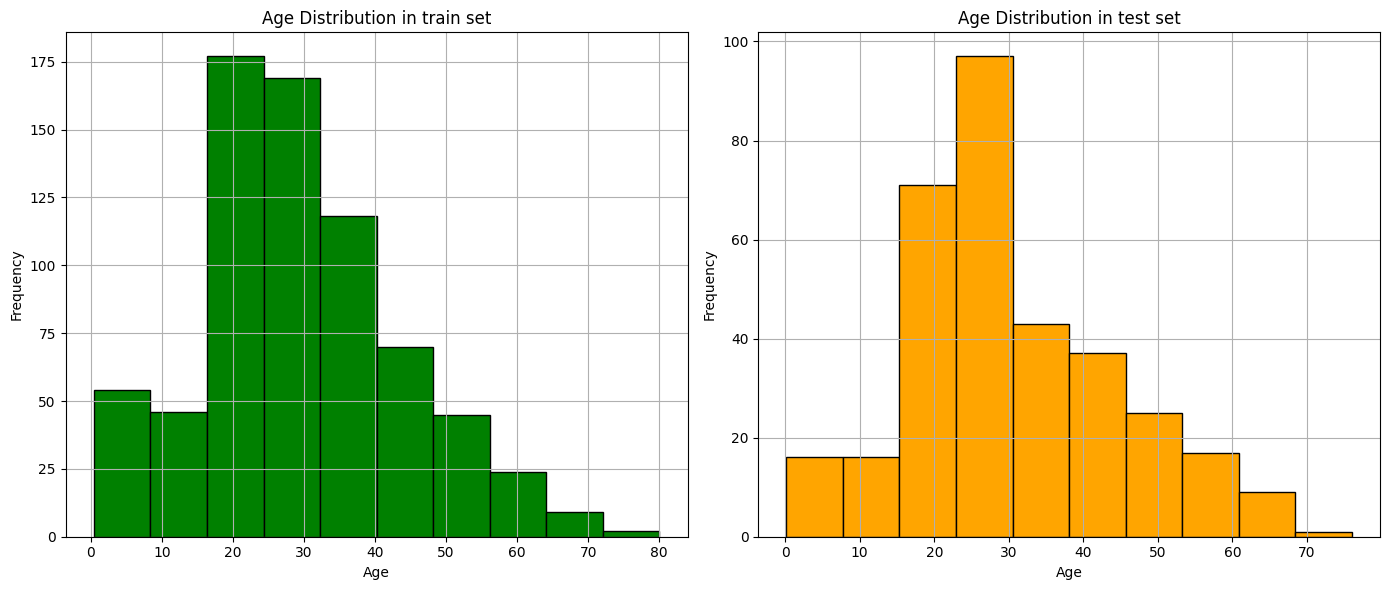

In [69]:
train_data.groupby([''])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = ['red', 'blue']


# Plot histogram for df1
ax1.hist(train_data['Age'], bins=10, edgecolor='black', color='green')
ax1.set_title('Age Distribution in train set')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Plot histogram for df2
ax2.hist(test_data['Age'], bins=10, edgecolor='black', color='orange')
ax2.set_title('Age Distribution in test set')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

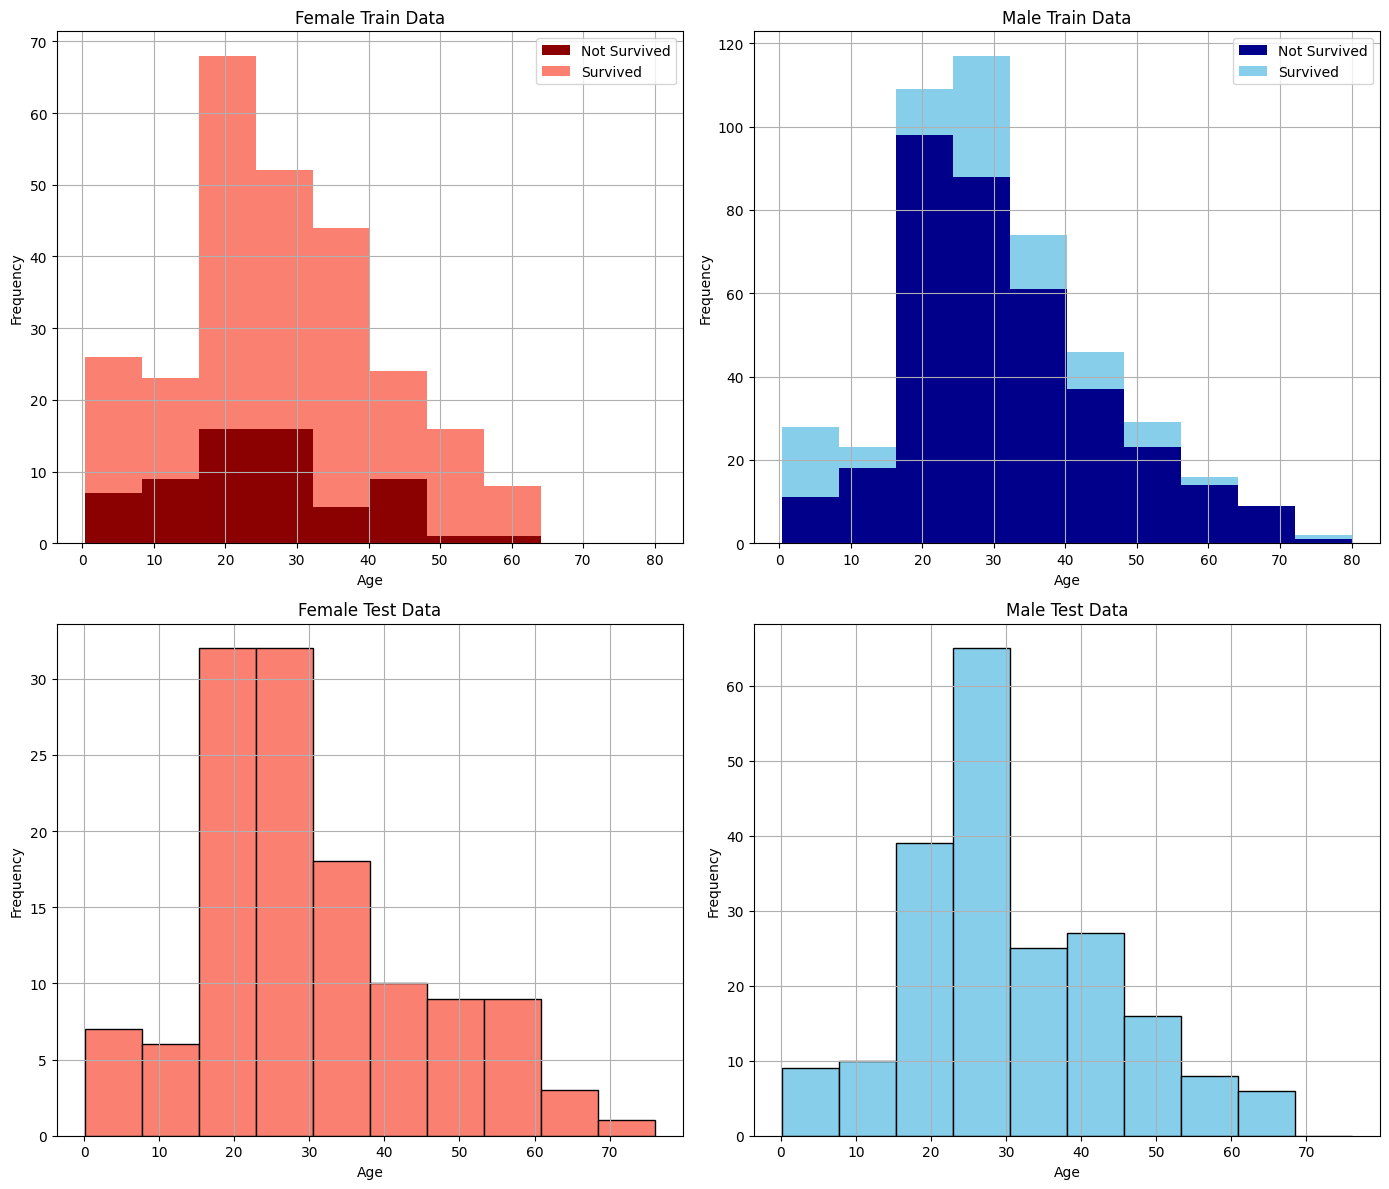

In [33]:
# Initialize the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Define color schemes
colors = {'male': ['darkblue', 'skyblue'], 'female': ['darkred', 'salmon']}

# Titles for each subplot
titles = ['Female Train Data', 'Male Train Data', 'Female Test Data', 'Male Test Data']

# Plot train data
for idx, sex in enumerate(['female', 'male']):
    ax = axes[idx]
    subset = train_data[train_data['Sex'] == sex]

    survived = subset[subset['Survived'] == 1]['Age']
    not_survived = subset[subset['Survived'] == 0]['Age']

    bins = np.linspace(train_data['Age'].min(), train_data['Age'].max(), 11)

    ax.hist([not_survived, survived], bins=bins, stacked=True, color=colors[sex], label=['Not Survived', 'Survived'])
    ax.set_title(f'{titles[idx]}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

# Plot test data
for idx, sex in enumerate(['female', 'male']):
    ax = axes[idx + 2]
    subset = test_data[test_data['Sex'] == sex]

    bins = np.linspace(test_data['Age'].min(), test_data['Age'].max(), 11)

    ax.hist(subset['Age'], bins=bins, edgecolor='black', color=colors[sex][1])
    ax.set_title(f'{titles[idx + 2]}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Exploring the influence of having a child / parent on board
## Considering cases only, when at least one child or parent is on board. The distribution is similar on train and test sets. Having a child or parent on board does not seem to increase the survival chances

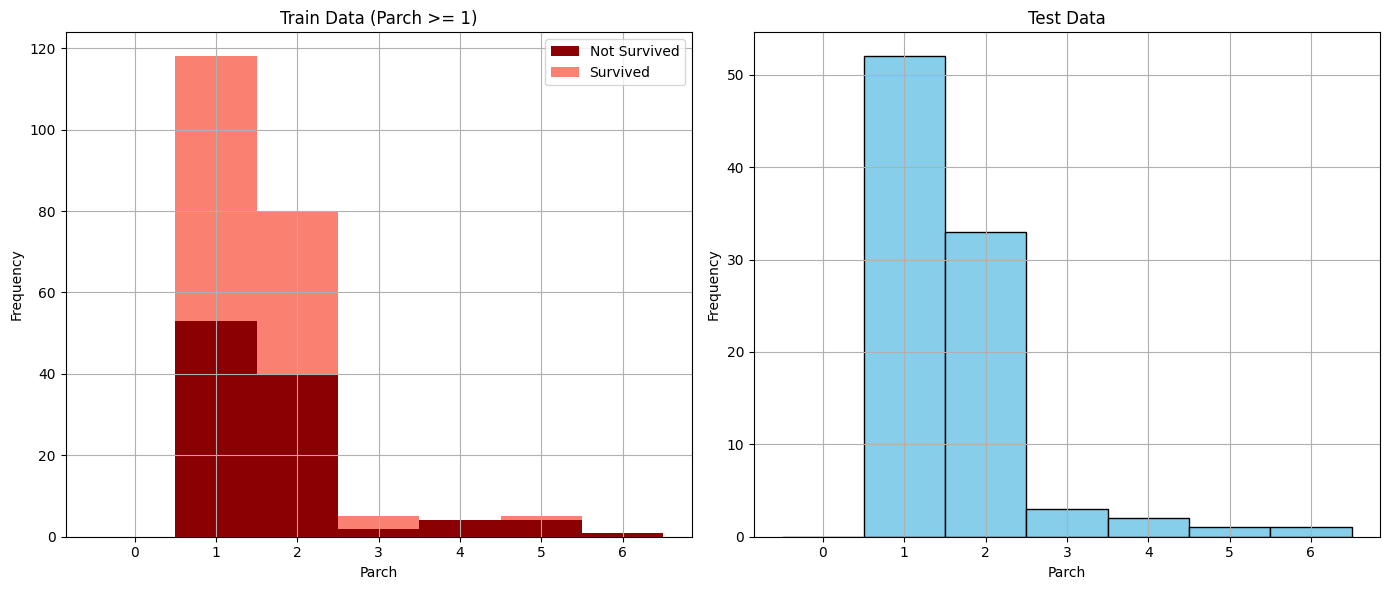

In [36]:
train_data_filtered = train_data[train_data['Parch'] >= 1]
test_data_filtered = test_data[test_data['Parch'] >= 1]

# Initialize the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot train data
ax = axes[0]
survived = train_data_filtered[train_data_filtered['Survived'] == 1]['Parch']
not_survived = train_data_filtered[train_data_filtered['Survived'] == 0]['Parch']

bins = np.arange(train_data['Parch'].min(), train_data['Parch'].max() + 2) - 0.5

ax.hist([not_survived, survived], bins=bins, stacked=True, color=['darkred', 'salmon'], label=['Not Survived', 'Survived'])
ax.set_title('Train Data (Parch >= 1)')
ax.set_xlabel('Parch')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True)

# Plot test data
ax = axes[1]
ax.hist(test_data_filtered['Parch'], bins=bins, edgecolor='black', color='skyblue')
ax.set_title('Test Data')
ax.set_xlabel('Parch')
ax.set_ylabel('Frequency')
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Exploring the influence of having a sibling / spouse on board
## Considering cases only, when at least one sibling or spouse is on board. The distribution is similar on train and test sets. Having a sibling or a spouse on board seem to increase the survival chances.

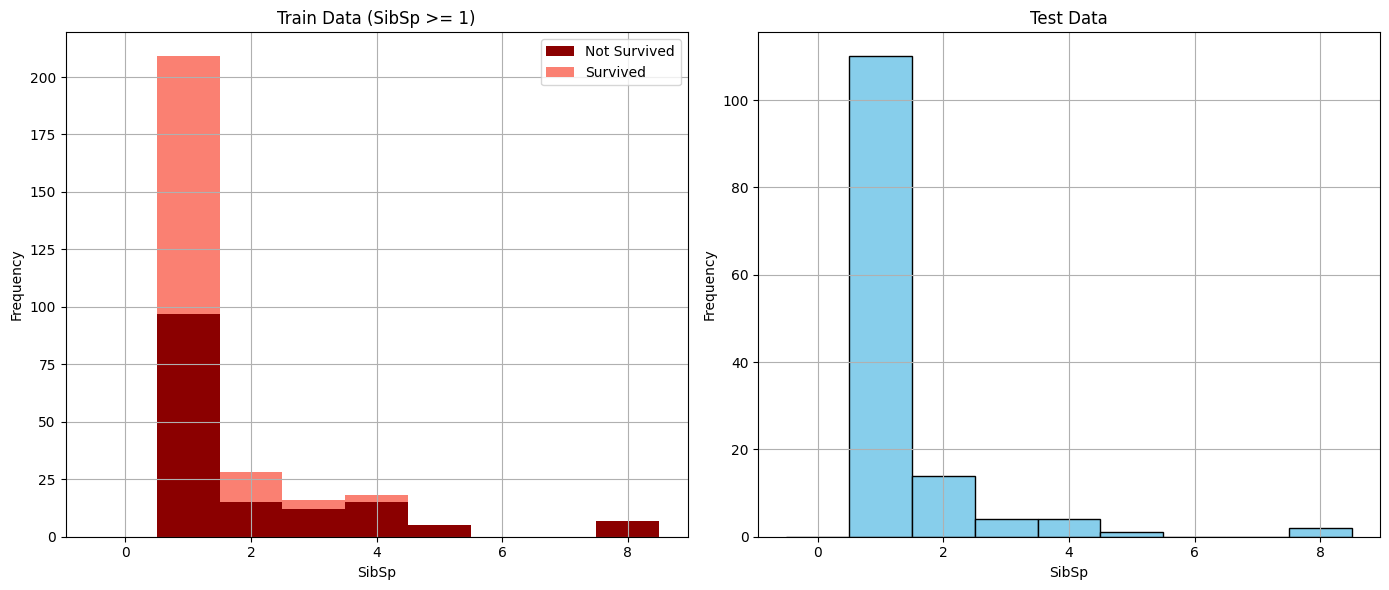

In [37]:
train_data_filtered = train_data[train_data['SibSp'] >= 1]
test_data_filtered = test_data[test_data['SibSp'] >= 1]

# Initialize the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot train data
ax = axes[0]
survived = train_data_filtered[train_data_filtered['Survived'] == 1]['SibSp']
not_survived = train_data_filtered[train_data_filtered['Survived'] == 0]['SibSp']

bins = np.arange(train_data['SibSp'].min(), train_data['SibSp'].max() + 2) - 0.5

ax.hist([not_survived, survived], bins=bins, stacked=True, color=['darkred', 'salmon'], label=['Not Survived', 'Survived'])
ax.set_title('Train Data (SibSp >= 1)')
ax.set_xlabel('SibSp')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True)

# Plot test data
ax = axes[1]
ax.hist(test_data_filtered['SibSp'], bins=bins, edgecolor='black', color='skyblue')
ax.set_title('Test Data')
ax.set_xlabel('SibSp')
ax.set_ylabel('Frequency')
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
